In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [ ]:
#dir='C:\\Users\\Hp\\.keras\\datasets\\cats_and_dogs_filtered'
url='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
data=tf.keras.utils.get_file('cats_and_dogs_filtered.zip',extract=True,
                            origin=url)
path=os.path.join(os.path.dirname(data),'cats_and_dogs_filtered')
print(path)
train_dir=os.path.join(path,'train')
val_dir=os.path.join(path,'validation')
print(train_dir)
print(val_dir)

C:\Users\Hp\.keras\datasets\cats_and_dogs_filtered
C:\Users\Hp\.keras\datasets\cats_and_dogs_filtered\train
C:\Users\Hp\.keras\datasets\cats_and_dogs_filtered\validation


In [ ]:
# Load dataset
BATCH_SIZE=32
IMG_SIZE=(160,160)
train_ds=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                            batch_size=BATCH_SIZE,image_size=IMG_SIZE,
                                                            shuffle=True)

val_ds=tf.keras.preprocessing.image_dataset_from_directory(val_dir,
                            batch_size=BATCH_SIZE,image_size=IMG_SIZE,
                                                            shuffle=True)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
class_names=train_ds.class_names
print(class_names)

['cats', 'dogs']


In [ ]:
# understand data [batch data]
# ttraion= 2000/32=
train_batches=tf.data.experimental.cardinality(train_ds)
print('Training Batch=',train_batches.numpy())
val_batches=tf.data.experimental.cardinality(val_ds)
print(val_batches.numpy())
####### test batch = 20% from validation 32//5=6
test_ds=val_ds.take(10)
validation_ds=val_ds.skip(10)
test_batches=tf.data.experimental.cardinality(test_ds)
print('Testing Batch=',test_batches.numpy())
validation_batches=tf.data.experimental.cardinality(validation_ds)
print('Validation Batch=',validation_batches.numpy())
# train_ds,test_ds,validation_ds

Training Batch= 63
32
Testing Batch= 10
Validation Batch= 22


(32, 160, 160, 3)
(32,)
tf.Tensor([0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0], shape=(32,), dtype=int32)


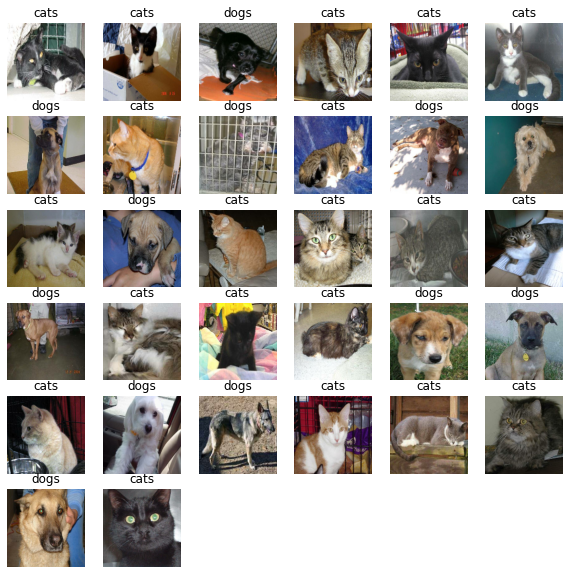

In [ ]:
for image_batch,label_batch in train_ds.take(1):
    print(image_batch.shape)
    print(label_batch.shape)
    print(label_batch)
    plt.figure(figsize=(10,10))
    for i in range(BATCH_SIZE):
        plt.subplot(6,6,i+1)
        plt.imshow(image_batch[i]/255.0)
        plt.axis('off')
        plt.title(class_names[label_batch[i]])
    

In [ ]:
num_batch=0
img=[]
label=[]
for image_batch,label_batch in train_ds:
    num_batch+=1
    img.append(image_batch)
    label.append(label_batch)
inputs=np.concatenate(img)
targets=np.concatenate(label)
print(num_batch)
print(inputs.shape)
print(targets.shape)

63
(2000, 160, 160, 3)
(2000,)


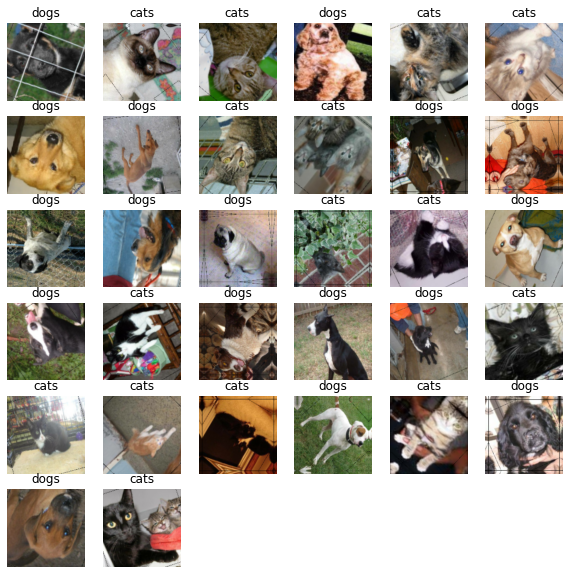

In [ ]:
# Data augmentation- overtraining
data_aug=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomFlip('vertical'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
    # RAndomCrop, RandomTranslation,RandomHeight.....
])
for image_batch,label_batch in train_ds.take(1):
    aug_images=data_aug(image_batch) #
    plt.figure(figsize=(10,10))
    for i in range(BATCH_SIZE):
        plt.subplot(6,6,i+1)
        plt.imshow(aug_images[i]/255.0)
        plt.axis('off')
        plt.title(class_names[label_batch[i]])

In [ ]:
# 24th Sept 2020
# preprocessing  
# Manual method [NOT recommended in transfer learning]
preprocess_unit=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(100,100),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255) # [0-1]
])
# In transfer learning, load a pretrained model ex-mobilenetv2
preprocess_input=tf.keras.applications.mobilenet_v2.preprocess_input
print(preprocess_input)

<function preprocess_input at 0x0000018FF6492D08>


In [ ]:
# how to load pretrained NN / imagenet
base_model=tf.keras.applications.MobileNetV2()
print('NUmber of layers=',len(base_model.layers))
print('NUmber of weights[W/b]=',len(base_model.weights))
print('NUmber of Training variables=',len(base_model.trainable_variables))
base_model.summary()

NUmber of layers= 157
NUmber of weights[W/b]= 262
NUmber of Training variables= 158
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                  

In [ ]:
# TRansfer Learning
base_model=tf.keras.applications.MobileNetV2(input_shape=(160,160,3),
                            include_top=False,weights='imagenet')
base_model.trainable=False # freeze model
#base_model.trainable=True# unfreeze
print('NUmber of layers=',len(base_model.layers))
print('NUmber of weights[W/b]=',len(base_model.weights))
print('NUmber of Training variables=',len(base_model.trainable_variables))
base_model.summary()

NUmber of layers= 155
NUmber of weights[W/b]= 260
NUmber of Training variables= 0
Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                    

In [ ]:
# custom model for image classification
inputs=tf.keras.Input(shape=(160,160,3)) # input layer
x=data_aug(inputs) # data augmentation
x=preprocess_input(x) # Preprocessing
x=base_model(x,training=False) # base model for feature extraction
#################################################################
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dropout(0.2)(x)
outputs=tf.keras.layers.Dense(1)(x) # binary class- cat/dog 
model=tf.keras.Model(inputs,outputs)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
tf_op_layer_RealDiv (TensorF [(None, 160, 160, 3)]     0         
_________________________________________________________________
tf_op_layer_Sub (TensorFlowO [(None, 160, 160, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)             

In [ ]:
lr=0.001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=lr),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
loss0,acc0=model.evaluate(test_ds)
print(acc0)

10/10 [==============================] - 7s 725ms/step - loss: 1.0269 - accuracy: 0.2937
0.29374998807907104


In [ ]:
inital_epoch=5
# base_model.train_variables=0
hist=model.fit(train_ds,epochs=inital_epoch,validation_data=validation_ds)
loss1,acc1=model.evaluate(test_ds)
print(acc1)

Epoch 1/5
63/63 [==============================] - 71s 1s/step - loss: 0.5219 - accuracy: 0.7105 - val_loss: 0.1643 - val_accuracy: 0.9309
Epoch 2/5
63/63 [==============================] - 60s 951ms/step - loss: 0.3213 - accuracy: 0.8475 - val_loss: 0.1148 - val_accuracy: 0.9559
Epoch 3/5
63/63 [==============================] - 60s 949ms/step - loss: 0.2647 - accuracy: 0.8810 - val_loss: 0.0969 - val_accuracy: 0.9647
Epoch 4/5
63/63 [==============================] - 61s 966ms/step - loss: 0.2599 - accuracy: 0.8855 - val_loss: 0.0881 - val_accuracy: 0.9706
Epoch 5/5
10/10 [==============================] - 5s 531ms/step - loss: 0.0935 - accuracy: 0.9594
0.9593750238418579


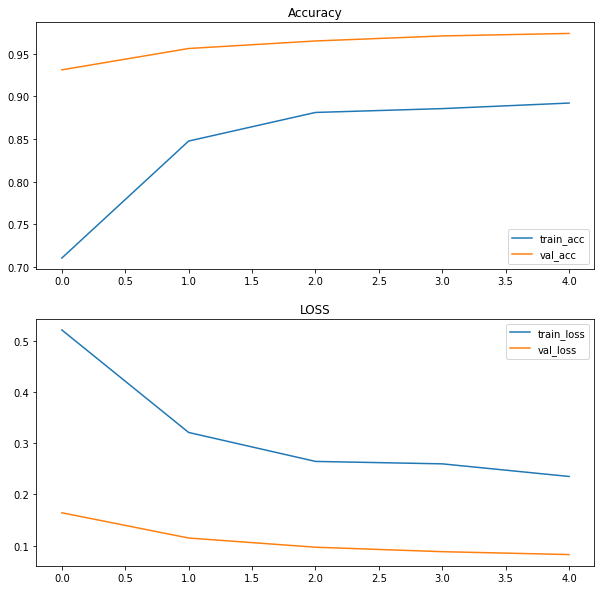

In [ ]:
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
###############
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(train_acc,label='train_acc')
plt.plot(val_acc,label='val_acc')
plt.title('Accuracy')
plt.legend()
plt.subplot(2,1,2)
plt.plot(train_loss,label='train_loss')
plt.plot(val_loss,label='val_loss')
plt.title('LOSS')
plt.legend()

# FIne -tunning

In [ ]:
base_model.trainable=True
print(len(base_model.trainable_variables)) # 0
##### Unfreeze only top layers
fine_tune_at=120
for layers in base_model.layers[:fine_tune_at]:
    layers.trainable=False
print(len(base_model.trainable_variables)) # 0

156
36


In [ ]:
lr=0.001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=lr/10),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
fine_epoch=5
total_epoch=inital_epoch+fine_epoch
# base_model.train_variables=0
hist_fine=model.fit(train_ds,epochs=total_epoch,
               initial_epoch=hist.epoch[-1],
                    validation_data=validation_ds)
loss2,acc2=model.evaluate(test_ds)
print(acc2)

Epoch 5/10
63/63 [==============================] - 74s 1s/step - loss: 0.3229 - accuracy: 0.8660 - val_loss: 0.0710 - val_accuracy: 0.9809
Epoch 6/10
63/63 [==============================] - 72s 1s/step - loss: 0.2207 - accuracy: 0.9010 - val_loss: 0.0649 - val_accuracy: 0.9735
Epoch 7/10
63/63 [==============================] - 80s 1s/step - loss: 0.2071 - accuracy: 0.9080 - val_loss: 0.0730 - val_accuracy: 0.9765
Epoch 8/10
63/63 [==============================] - 72s 1s/step - loss: 0.1621 - accuracy: 0.9355 - val_loss: 0.0865 - val_accuracy: 0.9706
Epoch 9/10
63/63 [==============================] - 86s 1s/step - loss: 0.1517 - accuracy: 0.9350 - val_loss: 0.0593 - val_accuracy: 0.9779
Epoch 10/10
10/10 [==============================] - 6s 553ms/step - loss: 0.0875 - accuracy: 0.9625
0.9624999761581421


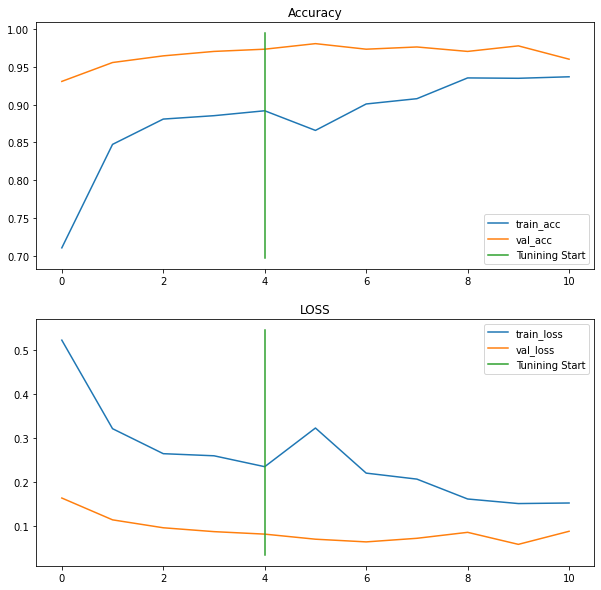

In [ ]:
train_acc+=hist_fine.history['accuracy'] # acc=[acc]+[new]=[]
val_acc+=hist_fine.history['val_accuracy']
train_loss+=hist_fine.history['loss']
val_loss+=hist_fine.history['val_loss']
###############
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(train_acc,label='train_acc')
plt.plot(val_acc,label='val_acc')
plt.plot([inital_epoch-1,inital_epoch-1],plt.ylim(),label='Tunining Start')
plt.title('Accuracy')
plt.legend()
plt.subplot(2,1,2)
plt.plot(train_loss,label='train_loss')
plt.plot(val_loss,label='val_loss')
plt.plot([inital_epoch-1,inital_epoch-1],plt.ylim(),label='Tunining Start')
plt.title('LOSS')
plt.legend()

Date: 30-09-2020
P2- Use of pre-trained NN as it is for image classification/predection
# tf.keras.applications

(224, 224, 3)
(1, 224, 224, 3)
prediction class= sports_car
prediction probability= 90.55348038673401


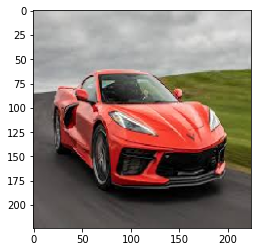

In [ ]:
# load an image
import tensorflow as tf
import matplotlib.pyplot as plt
image=tf.keras.preprocessing.image.load_img('C:\\Users\\Hp\\car.jpg',
                                           target_size=(224,224))
image=tf.keras.preprocessing.image.img_to_array(image)
print(image.shape)
plt.imshow(image/255)
############### Add a batch (1,224,224,3)
batch_image=tf.expand_dims(image,0)
print(batch_image.shape)
################ preprocess inputs
pre_image=tf.keras.applications.vgg16.preprocess_input(batch_image)
############## load a network
model=tf.keras.applications.VGG16()
pred=model.predict(pre_image)
#print(pred)
############## decode predicted values
label=tf.keras.applications.vgg16.decode_predictions(pred)
#print(label)
############## Best prediction
bp=label[0][0]
#print('prediction ID',bp[0])
print('prediction class=',bp[1])
print('prediction probability=',bp[2]*100)

(224, 224, 3)
(1, 224, 224, 3)
prediction class= golden_retriever
prediction probability= 93.8940942287445


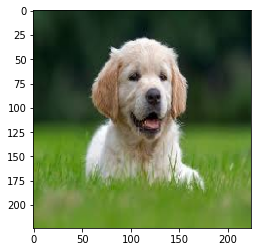

In [ ]:
# load an image
import tensorflow as tf
import matplotlib.pyplot as plt
image=tf.keras.preprocessing.image.load_img('C:\\Users\\Hp\\dog.jpg',
                                           target_size=(224,224))
image=tf.keras.preprocessing.image.img_to_array(image)
print(image.shape)
plt.imshow(image/255)
############### Add a batch (1,224,224,3)
batch_image=tf.expand_dims(image,0)
print(batch_image.shape)
################ preprocess inputs
pre_image=tf.keras.applications.xception.preprocess_input(batch_image)
############## load a network
model=tf.keras.applications.Xception()
pred=model.predict(pre_image)
#print(pred)
############## decode predicted values
label=tf.keras.applications.xception.decode_predictions(pred)
#print(label)
############## Best prediction
bp=label[0][0]
#print('prediction ID',bp[0])
print('prediction class=',bp[1])
print('prediction probability=',bp[2]*100)

(299, 299, 3)
(1, 299, 299, 3)
(1, 2048)
[[0.11357195 0.         0.00092335 ... 0.         0.01396387 0.        ]]


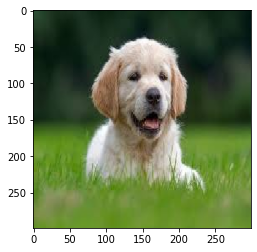

In [ ]:
###################### Pretrained NN as feature extraction
# load an image
import tensorflow as tf
import matplotlib.pyplot as plt
image=tf.keras.preprocessing.image.load_img('C:\\Users\\Hp\\dog.jpg',
                                           target_size=(299,299))
image=tf.keras.preprocessing.image.img_to_array(image)
print(image.shape)
plt.imshow(image/255)
############### Add a batch (1,224,224,3)
batch_image=tf.expand_dims(image,0)
print(batch_image.shape)
################ preprocess inputs
pre_image=tf.keras.applications.xception.preprocess_input(batch_image)
###################### Feature extraction model
model=tf.keras.applications.Xception()
model=tf.keras.Model(inputs=model.inputs,
                     outputs=model.layers[-2].output
                    )
#model.summary()
##################
feat=model.predict(pre_image)
print(feat.shape)
print(feat)
############# Save 
import pandas as pd
df=pd.DataFrame(feat)
df.to_csv('dog_feat.csv')

(299, 299, 3)
(1, 299, 299, 3)
(1, 10)
[[ 0.27244046 -0.4543768   0.4909804  -0.00433279  0.02023849  0.20869868
   0.12784007  0.00649841  0.27158576 -0.23869926]]


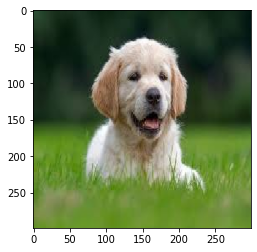

In [ ]:
#  TRansfer learning
###################### Pretrained NN as feature extraction
# load an image
import tensorflow as tf
import matplotlib.pyplot as plt
image=tf.keras.preprocessing.image.load_img('C:\\Users\\Hp\\dog.jpg',
                                           target_size=(299,299))
image=tf.keras.preprocessing.image.img_to_array(image)
print(image.shape)
plt.imshow(image/255)
############### Add a batch (1,224,224,3)
batch_image=tf.expand_dims(image,0)
print(batch_image.shape)
################ preprocess inputs
pre_image=tf.keras.applications.xception.preprocess_input(batch_image)
###################### Feature extraction model
model=tf.keras.applications.Xception(input_shape=(299,299,3),
                                    include_top=False,
                                    weights='imagenet')
inputs=tf.keras.Input(shape=(299,299,3))
x=model(inputs,training=False) # feature
x=tf.keras.layers.GlobalAveragePooling2D()(x) # 2048
outputs=tf.keras.layers.Dense(10)(x) # 10
model=tf.keras.Model(inputs,outputs)

#model.summary()
##################
feat=model.predict(pre_image)
print(feat.shape)
print(feat)
############# Save 
import pandas as pd
df=pd.DataFrame(feat)
df.to_csv('dog_feat.csv')

In [ ]:
model=tf.keras.applications.Xception(input_shape=(299,299,3),
                                    include_top=False,
                                    weights='imagenet')
inputs=tf.keras.Input(shape=(299,299,3))
x=model(inputs,training=False) # feature
x=tf.keras.layers.GlobalAveragePooling2D()(x) # 2048
outputs=tf.keras.layers.Dense(10)(x) # 10
model=tf.keras.Model(inputs,outputs)
model.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 299, 299, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 10, 10, 2048)      20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                20490     
Total params: 20,881,970
Trainable params: 20,827,442
Non-trainable params: 54,528
_________________________________________________________________


In [ ]:
# P4- Extact features using TL and classify using SVM
# Load dataset
# load a base model and create a model for FE

In [ ]:
import tensorflow as tf
data_dir='C:\\Users\\Hp\\.keras\\datasets\\DT'batch_size=10,image_size=(299,299))
data=tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                    batch_size=10,image_size=(299,299))


Found 60 files belonging to 2 classes.


In [ ]:
class_names=data.class_names
print(class_names)

['rose', 'sunflower']


In [ ]:
num_batch=tf.data.experimental.cardinality(data)
print(num_batch)

tf.Tensor(6, shape=(), dtype=int64)


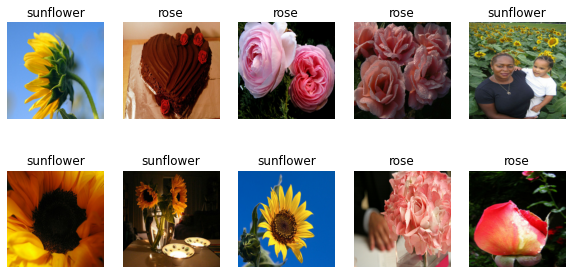

In [ ]:
image_batch,label_batch=next(iter(data))
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(image_batch[i]/255)
    plt.title(class_names[label_batch[i]])
    plt.axis('off')

In [ ]:
image=[]
label=[]
for image_batch,label_batch in data:
    image.append(image_batch)
    label.append(label_batch)
import numpy as np
x_images=np.concatenate(image)
x_target=np.concatenate(label)
print(x_images.shape)
print(x_target.shape)

(60, 299, 299, 3)
(60,)


Text(0.5, 1.0, 'rose')

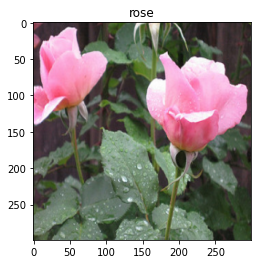

In [ ]:
i=59
plt.imshow(x_images[i]/255)
plt.title(class_names[x_target[i]])

In [ ]:
model=tf.keras.applications.Xception(input_shape=(299,299,3),
                                    include_top=False,
                                    weights='imagenet')
inputs=tf.keras.Input(shape=(299,299,3))
x=model(inputs,training=False) # feature
x=tf.keras.layers.GlobalAveragePooling2D()(x) # 2048
x=tf.keras.layers.Dense(200)(x) # 10
x=tf.keras.layers.Dense(100)(x)
outputs=tf.keras.layers.Dense(500)(x)
model=tf.keras.Model(inputs,outputs)
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 299, 299, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 10, 10, 2048)      20861480  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               409800    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_5 (Dense)              (None, 500)               50500     
Total params: 21,341,880
Trainable params: 21,287,352
Non-trainable params: 54,528
_____________________________________

In [ ]:
feat=model.predict(x_images)
print(feat.shape) # 60x10
#####################################
import pandas as pd
pd.DataFrame(feat).to_csv('k19ml_input.csv',index=False)
pd.DataFrame(x_target).to_csv('k19ml_target.csv',index=False)

(60, 500)


In [ ]:
x=pd.read_csv('k19ml_input.csv')
y=pd.read_csv('k19ml_target.csv')
print(x.shape)
print(y.shape)

(60, 500)
(60, 1)


In [ ]:
############# train_test_split
from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.2,
                                                 random_state=0)
print(x_train.shape)
print(x_test.shape)
################# Standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)
##################### SVM
from sklearn.svm import SVC
clf=SVC()
clf.fit(x_train_std,y_train)
y_pred=clf.predict(x_test_std)
################### accuracy
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(clf.predict(x_train_std),y_train)
test_acc=accuracy_score(y_pred,y_test)
print('Training acc=',train_acc*100)
print('Testing acc=',test_acc*100)


(48, 500)
(12, 500)
Training acc= 87.5
Testing acc= 83.33333333333334


C:\Users\Hp\anaconda3\envs\python_new\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:
y_test=y_test.values.flatten()
print(y_test)
print(y_pred)


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
print(y_test==y_pred)
print('Musclassified samples=',(y_test!=y_pred).sum())


[ True  True False  True  True  True False  True  True  True  True  True]
Musclassified samples= 2


In [ ]:
i=10
print('Target class=',class_names[y_test.values.flatten()[i]])
print('predicted class=',class_names[y_pred[i]])

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
y_test.values.flatten()

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

# Date: 3rd-oct-2020
############## AUTO-ENCODERS- Sequental model
1st part-Encoder(encryption/copression)
2nd part-Decoder(decryption/reconstruction)
#1. Autoencoder for image compression
#2. Autoencoders for removal of noise(denoising autoencoder)
#3. Autoencoders for anomoly detection

# 1. Autoencoder for image compression
Step1- LOad a dataset
step2-Design a model contains encoder[reduce dim] & decoder[reconstruct]
step3-compile,fit, visulize etc.

In [ ]:
import tensorflow as tf
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()
x_train=x_train/255.0
x_test=x_test/255.0
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


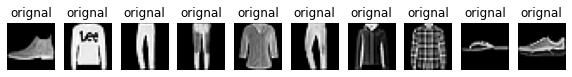

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_test[i])
    plt.title('orignal')
    plt.gray()
    plt.axis('off')

In [ ]:
class autoencoder_comp(tf.keras.Model):
    def __init__(self,encoding_dim):
        super(autoencoder_comp,self).__init__()
        self.dim=encoding_dim
        self.encoder=tf.keras.Sequential([
            tf.keras.layers.Flatten(), # 28x28->784
            tf.keras.layers.Dense(self.dim,activation='relu')
        ])
        self.decoder=tf.keras.Sequential([
            tf.keras.layers.Dense(784,activation='sigmoid'),
            tf.keras.layers.Reshape((28,28))
        ])
    def call(self,x):
        encoded=self.encoder(x)
        decoded=self.decoder(encoded)
        return decoded
autoenc=autoencoder_comp(64)   # 28x28-layer-

In [ ]:
autoenc.compile(loss='mse',optimizer='adam')
autoenc.fit(x_train,x_train,epochs=10,shuffle=True,
           validation_data=(x_test,x_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0241 - val_loss: 0.0133
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0117 - val_loss: 0.0108
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0102 - val_loss: 0.0099
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0096 - val_loss: 0.0095
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0090 - val_loss: 0.0092
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.008

In [ ]:
encoding_image=autoenc.encoder(x_test)
decoding_image=autoenc.decoder(encoding_image)

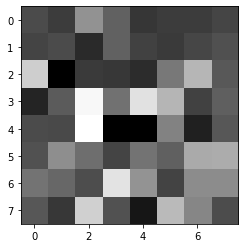

In [ ]:
encoding_img=encoding_image/tf.reduce_max(encoding_image)
layer=tf.keras.layers.Reshape((8,8))
encoding_img=layer(encoding_img)
plt.imshow(encoding_img[0])

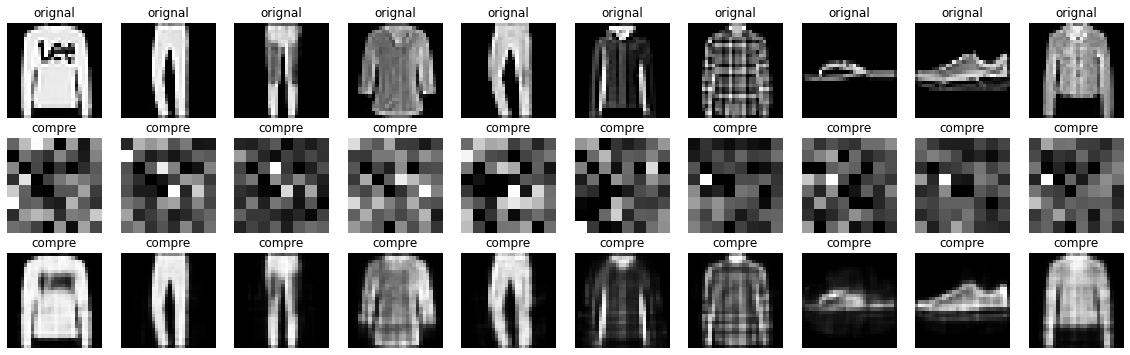

In [ ]:
n=10
plt.figure(figsize=(20,6))
for i in range(1,n+1):
    plt.subplot(3,n,i)
    plt.imshow(x_test[i])
    plt.gray()
    plt.axis('off')
    plt.title('orignal')
    #######################
    plt.subplot(3,n,i+n)
    plt.imshow(encoding_img[i])
    plt.gray()
    plt.axis('off')
    plt.title('compre')
    #######################
    plt.subplot(3,n,i+2*n)
    plt.imshow(decoding_image[i])
    plt.gray()
    plt.axis('off')
    plt.title('compre')


In [ ]:
# P2- Denoising Autoencoder

In [ ]:
import tensorflow as tf
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()
x_train=x_train/255.0
x_test=x_test/255.0
x_train=x_train[...,tf.newaxis]
x_test=x_test[...,tf.newaxis]
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
noise_factor=0.2
x_train_noise=x_train+noise_factor*tf.random.normal(shape=x_train.shape)
x_test_noise=x_test+noise_factor*tf.random.normal(shape=x_test.shape)
x_train_noise=tf.clip_by_value(x_train_noise,clip_value_min=0.0,
                        clip_value_max=1.0)
x_test_noise=tf.clip_by_value(x_test_noise,clip_value_min=0.0,
                        clip_value_max=1.0)

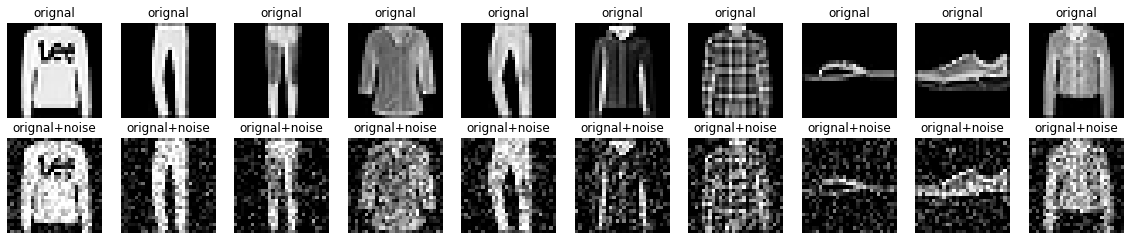

In [ ]:
n=10
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
for i in range(1,n+1):
    plt.subplot(3,n,i)
    plt.imshow(x_test[i])
    plt.gray()
    plt.axis('off')
    plt.title('orignal')
    #######################
    plt.subplot(3,n,i+n)
    plt.imshow(x_test_noise[i])
    plt.gray()
    plt.axis('off')
    plt.title('orignal+noise')

In [ ]:
class autoencoder_noise(tf.keras.Model):
    def __init__(self):
        super(autoencoder_noise,self).__init__()
        self.encoder=tf.keras.Sequential([
            tf.keras.layers.Input(shape=(28,28,1)),
            tf.keras.layers.Conv2D(16,3,padding='same'), # 28x28x16
            tf.keras.layers.Conv2D(8,3,padding='same') # 28x28x8
        ])
        self.decoder=tf.keras.Sequential([
            tf.keras.layers.Conv2DTranspose(8,3,padding='same'),# 28,28,8
            tf.keras.layers.Conv2DTranspose(16,3,padding='same'),#28,28,
            tf.keras.layers.Conv2D(1,3,padding='same'),
        ])
    def call(self,x):
        encoded=self.encoder(x)
        decoded=self.decoder(encoded)
        return decoded
autoenc=autoencoder_noise()

In [ ]:
autoenc.compile(optimizer='adam',loss='mse')
autoenc.fit(x_train_noise,x_train,epochs=2,
            validation_data=(x_test_noise,x_test))

Epoch 1/2
1875/1875 [==============================] - 146s 78ms/step - loss: 0.0105 - val_loss: 0.0097
Epoch 2/2
1875/1875 [==============================] - 139s 74ms/step - loss: 0.0097 - val_loss: 0.0097


In [ ]:
encoding_img=autoenc.encoder(x_test_noise)
decodeing_img=autoenc.decoder(encoding_img)

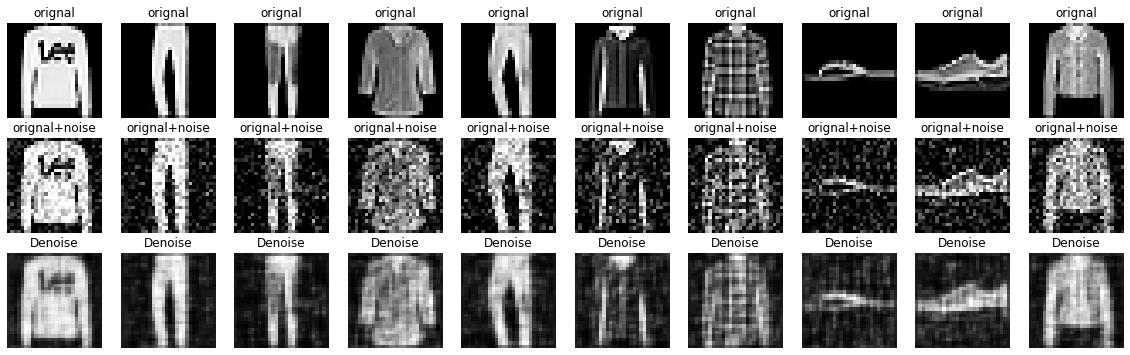

In [ ]:
n=10
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
for i in range(1,n+1):
    plt.subplot(3,n,i)
    plt.imshow(x_test[i])
    plt.gray()
    plt.axis('off')
    plt.title('orignal')
    #######################
    plt.subplot(3,n,i+n)
    plt.imshow(x_test_noise[i])
    plt.gray()
    plt.axis('off')
    plt.title('orignal+noise')
     #######################
    plt.subplot(3,n,i+2*n)
    plt.imshow(decodeing_img[i])
    plt.gray()
    plt.axis('off')
    plt.title('Denoise')

In [ ]:
#p3-Anomoly detection using autoencoder
# 
dir='C:\\Users\\Hp\\.keras\\datasets\\ecg.csv'
import pandas as pd
df=pd.read_csv(dir,header=None)
print(df.shape)
print(df.head())
print(df.describe())
raw_data=df.values

(4998, 141)
        0         1         2         3         4         5         6    \
0 -0.112522 -2.827204 -3.773897 -4.349751 -4.376041 -3.474986 -2.181408   
1 -1.100878 -3.996840 -4.285843 -4.506579 -4.022377 -3.234368 -1.566126   
2 -0.567088 -2.593450 -3.874230 -4.584095 -4.187449 -3.151462 -1.742940   
3  0.490473 -1.914407 -3.616364 -4.318823 -4.268016 -3.881110 -2.993280   
4  0.800232 -0.874252 -2.384761 -3.973292 -4.338224 -3.802422 -2.534510   

        7         8         9    ...       131       132       133       134  \
0 -1.818287 -1.250522 -0.477492  ...  0.792168  0.933541  0.796958  0.578621   
1 -0.992258 -0.754680  0.042321  ...  0.538356  0.656881  0.787490  0.724046   
2 -1.490658 -1.183580 -0.394229  ...  0.886073  0.531452  0.311377 -0.021919   
3 -1.671131 -1.333884 -0.965629  ...  0.350816  0.499111  0.600345  0.842069   
4 -1.783423 -1.594450 -0.753199  ...  1.148884  0.958434  1.059025  1.371682   

        135       136       137       138       139  140

In [ ]:
label=raw_data[:,-1]
data=raw_data[:,0:-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,label,test_size=0.3)
print(x_train.shape)
print(x_test.shape)
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms.fit(x_train)
x_train_mms=mms.transform(x_train)
x_test_mms=mms.transform(x_test)

(3498, 140)
(1500, 140)


In [ ]:
# two labesls = 0 - abnormal, 1-normal
train_label=y_train.astype(bool)
test_label=y_test.astype(bool)
normal_train_data=x_train_mms[train_label]
abnormal_train_data=x_train_mms[~train_label]
normal_test_data=x_test_mms[test_label]
abnormal_test_data=x_test_mms[~test_label]
print(normal_train_data.shape)
print(abnormal_train_data.shape)
print(normal_test_data.shape)
print(abnormal_test_data.shape)

(2037, 140)
(1461, 140)
(882, 140)
(618, 140)


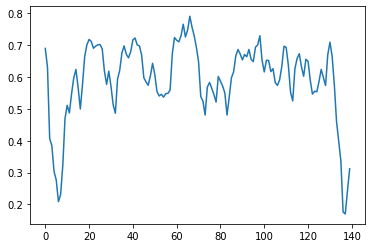

In [ ]:
import numpy as np
plt.plot(np.arange(140),abnormal_test_data[0])

In [ ]:
class autoencoder_ano(tf.keras.Model):
    def __init__(self):
        super(autoencoder_ano,self).__init__()
        self.encoder=tf.keras.Sequential([
            tf.keras.layers.Dense(32),
            tf.keras.layers.Dense(16),
            tf.keras.layers.Dense(8)
        ])
        self.decoder=tf.keras.Sequential([
            tf.keras.layers.Dense(32),
            tf.keras.layers.Dense(64),
            tf.keras.layers.Dense(140)
        ])
    def call(self,x):
        encoded=self.encoder(x)
        decoded=self.decoder(encoded)
        return decoded
autoenc=autoencoder_ano()

In [ ]:
autoenc.compile(optimizer='adam',loss='mse')
hist=autoenc.fit(normal_train_data,normal_train_data,epochs=20,
              validation_data=(normal_test_data,normal_test_data))

Epoch 1/20
64/64 [==============================] - 0s 4ms/step - loss: 0.0063 - val_loss: 0.0049
Epoch 2/20
64/64 [==============================] - 0s 3ms/step - loss: 0.0041 - val_loss: 0.0037
Epoch 3/20
64/64 [==============================] - 0s 3ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 4/20
64/64 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 5/20
64/64 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 6/20
64/64 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 7/20
64/64 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 8/20
64/64 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 9/20
64/64 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 10/20
64/64 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 11/20
64/64 [

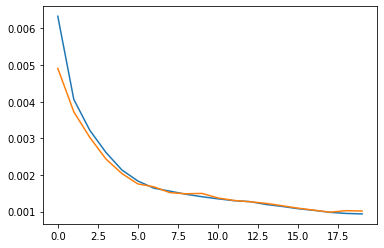

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [ ]:
encoded_sig=autoenc.encoder(normal_test_data)
decoded_sig=autoenc.decoder(encoded_sig)

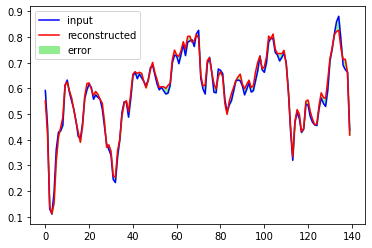

In [ ]:
plt.plot(normal_test_data[0],'b')
plt.plot(decoded_sig[0],'r')
plt.fill_between(np.arange(140),decoded_sig[0],normal_test_data[0],
                color='lightgreen')
plt.legend(['input','reconstructed','error'])


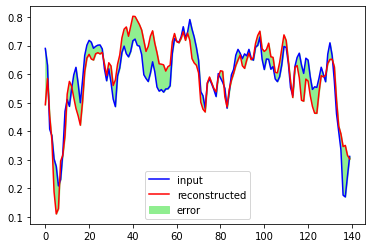

In [ ]:
abencoded_sig=autoenc.encoder(abnormal_test_data)
abdecoded_sig=autoenc.decoder(abencoded_sig)
plt.plot(abnormal_test_data[0],'b')
plt.plot(abdecoded_sig[0],'r')
plt.fill_between(np.arange(140),abdecoded_sig[0],abnormal_test_data[0],
                color='lightgreen')
plt.legend(['input','reconstructed','error'])


In [ ]:
loss=tf.keras.losses.mse(abdecoded_sig,abnormal_test_data)
#print(loss)
plt.hist(loss,bins=50)
plt.show()

tf.Tensor(
[0.00437726 0.00648406 0.00386061 0.00663709 0.00501311 0.00560279
 0.00518639 0.00562117 0.00326907 0.00659012 0.00945273 0.00556178
 0.00487284 0.00914794 0.00841352 0.00914636 0.00607892 0.0078843
 0.00466657 0.00513068 0.00497323 0.01226457 0.03396314 0.00564693
 0.01227539 0.00989123 0.00554295 0.00496258 0.00326864 0.0059856
 0.00769544 0.00734116 0.00269577 0.0034441  0.00385033 0.004717
 0.00464357 0.00501276 0.0134323  0.00352438 0.00408113 0.00436955
 0.00046002 0.00585692 0.00659422 0.00576804 0.00380704 0.00368855
 0.00448739 0.00550569 0.00545763 0.0034717  0.0097267  0.0038865
 0.00468305 0.00443259 0.00840905 0.00600758 0.0048819  0.00416803
 0.00685293 0.0059127  0.00398281 0.00660394 0.00641317 0.00447041
 0.00418977 0.00606149 0.00447288 0.00499276 0.0055263  0.00377293
 0.0045274  0.00543367 0.00550669 0.00480553 0.00614234 0.00374071
 0.00435319 0.00403724 0.00368345 0.00590914 0.00411881 0.01173475
 0.00465777 0.00384654 0.00422428 0.0044616  0.0043726  